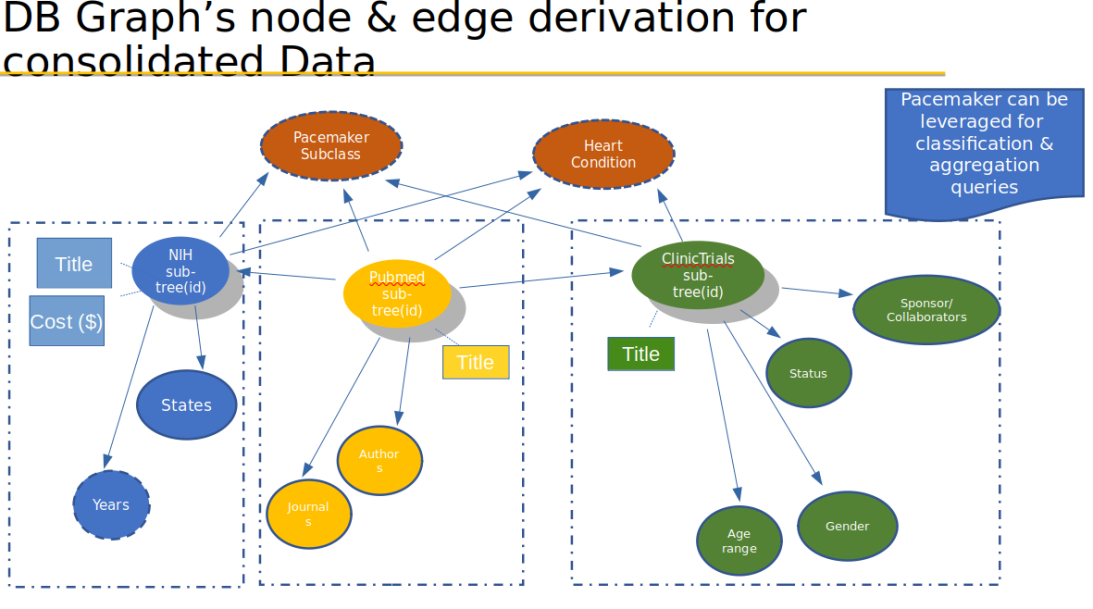

#### pacemaker sub-class nodes

LOAD CSV WITH HEADERS FROM 'file:///subclass_nodes.csv' AS row MERGE (sc:SUBCLASS {sc_id: row.id}) ON CREATE SET sc.name = row.label;

#### condition nodes

LOAD CSV WITH HEADERS FROM 'file:///condition_nodes.csv' AS row MERGE (cn:CONDITION {cn_id: row.id}) ON CREATE SET cn.name = row.label;

#### NIH nodes

##### states
LOAD CSV WITH HEADERS FROM 'file:///state_nodes.csv' AS row MERGE (st:STATES {st_id: row.id}) ON CREATE SET st.name = row.label;

##### years
LOAD CSV WITH HEADERS FROM 'file:///year_nodes.csv' AS row MERGE (yr:YEARS {yr_id: row.id}) ON CREATE SET yr.name = row.label;

##### id  title and cost attribute
LOAD CSV WITH HEADERS FROM 'file:///nih_nodes.csv' AS row MERGE (n:NIH {n_id: row.id}) ON CREATE SET n.title = row.project_title, n.cost = toFloat(row.total_cost);

#### NIH edges

##### years edges
LOAD CSV WITH HEADERS FROM 'file:///inyear_edges.csv' AS row MATCH (n:NIH {n_id: row.id_source}) MATCH (yr:YEARS {yr_id: row.id_target}) MERGE (n) - [op:YEARS_EDGE]->(yr);

##### states edges
##### Didnt create any edges , no info or warning . Need to fix empty mappings
LOAD CSV WITH HEADERS FROM 'file:///instate_edges.csv' AS row MATCH (n:NIH {n_id: row.id_source}) MATCH (st:STATES {st_id: row.id_target}) MERGE (n) - [op:STATE_EDGE]->(st);

##### nih-subclass edges
LOAD CSV WITH HEADERS FROM 'file:///nih_subclass_edges.csv' AS row MATCH (n:NIH {n_id: row.id_source}) MATCH (sc:SUBCLASS {sc_id: row.id_target}) MERGE (n) - [op:CLASS_EDGE]->(sc);

##### nih-condition edges
LOAD CSV WITH HEADERS FROM 'file:///nih_condition_edges.csv' AS row MATCH (n:NIH {n_id: row.id_source}) MATCH (cn:CONDITION {cn_id: row.id_target}) MERGE (n) - [op:CONDITION_EDGE]->(cn);

#### pubMED nodes

##### Authors
LOAD CSV WITH HEADERS FROM 'file:///author_nodes.csv' AS row MERGE (a:AUTHOR {a_id: row.id}) ON CREATE SET a.name = row.label;

##### Journals
LOAD CSV WITH HEADERS FROM 'file:///journal_nodes.csv' AS row MERGE (j:JOURNAL {j_id: row.id}) ON CREATE SET j.name = row.label;

##### id and title attribute
LOAD CSV WITH HEADERS FROM 'file:///pubmed_nodes.csv' AS row MERGE (p:PUBMED {p_id: row.id}) ON CREATE SET p.title = row.title;

#### PUBMED edges

##### authoredby_edges edges
##### fix required
LOAD CSV WITH HEADERS FROM 'file:///authoredby_edges.csv' AS row MATCH (p:PUBMED {p_id: row.id_source}) MATCH (a:AUTHOR {a_id: row.id_target}) MERGE (p) - [op:AUTHOR_EDGE]->(a);

##### publishedin_edges edges
LOAD CSV WITH HEADERS FROM 'file:///publishedin_edges.csv' AS row MATCH (p:PUBMED {p_id: row.id_source}) MATCH (j:JOURNAL {j_id: row.id_target}) MERGE (p) - [op:JOURNAL_EDGE]->(j);

##### pubmed-subclass edges
LOAD CSV WITH HEADERS FROM 'file:///pubmed_subclass_edges.csv' AS row MATCH (p:PUBMED {p_id: row.id_source}) MATCH (sc:SUBCLASS {sc_id: row.id_target}) MERGE (p) - [op:CLASS_EDGE]->(sc);

##### pubmed-condition edges
LOAD CSV WITH HEADERS FROM 'file:///pubmed_condition_edges.csv' AS row MATCH (p:PUBMED {p_id: row.id_source}) MATCH (cn:CONDITION {cn_id: row.id_target}) MERGE (p) - [op:CONDITION_EDGE]->(cn);

##### pubmed-nih edges
LOAD CSV WITH HEADERS FROM 'file:///pubmed_nih_edges.csv' AS row MATCH (p:PUBMED {p_id: row.id_Source}) MATCH (n:NIH {n_id: row.id_Target}) MERGE (p) - [op:ENTITY_MAP_EDGE]->(n);

#### ClinicalTrial nodes

##### gender
LOAD CSV WITH HEADERS FROM 'file:///gender_nodes.csv' AS row MERGE (g:GENDER {g_id: row.id}) ON CREATE SET g.name = row.label;

##### sponsor
LOAD CSV WITH HEADERS FROM 'file:///sponsor_nodes.csv' AS row MERGE (s:SPONSOR {s_id: row.id}) ON CREATE SET s.name = row.label;

##### status
LOAD CSV WITH HEADERS FROM 'file:///status_nodes.csv' AS row MERGE (st:STATUS {st_id: row.id}) ON CREATE SET st.name = row.label;

##### agegroup_nodes
LOAD CSV WITH HEADERS FROM 'file:///agegroup_nodes.csv' AS row MERGE (ag:AGE_GROUP {ag_id: row.id}) ON CREATE SET ag.name = row.label;

##### id and title attribute
LOAD CSV WITH HEADERS FROM 'file:///clintrials_nodes.csv' AS row MERGE (c:CLINIC_TRIAL {c_id: row.id}) ON CREATE SET c.title = row.title;

#### CLINICAL_TRIAL edges

##### hasagegroup_edges edges
LOAD CSV WITH HEADERS FROM 'file:///hasagegroup_edges.csv' AS row MATCH (c:CLINIC_TRIAL {c_id: row.id_source}) MATCH (ag:AGE_GROUP {ag_id: row.id_target}) MERGE (c) - [op:AGE_EDGE]->(ag);

##### haseligiblegender_edges edges
LOAD CSV WITH HEADERS FROM 'file:///haseligiblegender_edges.csv' AS row MATCH (c:CLINIC_TRIAL {c_id: row.id_source}) MATCH (g:GENDER {g_id: row.id_target}) MERGE (c) - [op:GENDER_EDGE]->(g);

##### hasstatus_edges edges
LOAD CSV WITH HEADERS FROM 'file:///hasstatus_edges.csv' AS row MATCH (c:CLINIC_TRIAL {c_id: row.id_source}) MATCH (st:STATUS {st_id: row.id_target}) MERGE (c) - [op:STATUS_EDGE]->(st);

##### sponsoredby_edges edges
LOAD CSV WITH HEADERS FROM 'file:///sponsoredby_edges.csv' AS row MATCH (c:CLINIC_TRIAL {c_id: row.id_source}) MATCH (s:SPONSOR {s_id: row.id_target}) MERGE (c) - [op:SPONSOR_EDGE]->(s);

##### clinic-subclass edges
LOAD CSV WITH HEADERS FROM 'file:///clin_subclass_edges.csv' AS row MATCH (c:CLINIC_TRIAL {c_id: row.id_source}) MATCH (sc:SUBCLASS {sc_id: row.id_target}) MERGE (c) - [op:CLASS_EDGE]->(sc);

##### clinic-condition edges
LOAD CSV WITH HEADERS FROM 'file:///clin_condition_edges.csv' AS row MATCH (c:CLINIC_TRIAL {c_id: row.id_source}) MATCH (cn:CONDITION {cn_id: row.id_target}) MERGE (c) - [op:CONDITION_EDGE]->(cn);

##### pubmed_clintrials_edges edges
LOAD CSV WITH HEADERS FROM 'file:///pubmed_clintrials_edges.csv' AS row MATCH (p:PUBMED {p_id: row.id_Source}) MATCH  (c:CLINIC_TRIAL {c_id: row.id_Target}) MERGE (p) - [op:ENTITY_MAP_EDGE]->(c);

### Query Ideas

- Which subclasses of pacemakers are being evaluated in the most clinical trials?
- In which states is the most money granted to NIH projects?
- What journals more commonly publish papers relating to a specific subclass or heart condition?
- Which authors have published the most about pacemakers?
- Which organizations are sponsoring the most clinical trials in the field?
- Which organizations are sponsoring the most clinical trials related to a specific subclass or heart condition?
- Which organizations sponsor the most clinical trials for younger age groups?
- Which heart conditions get the most funding through NIH grants?
- What age groups / genders are eligible for a certain subclass of pacemaker?
- Is there a heart condition that gets lots of funding but not many clinical trials? Or vice versa?
- Is the NIH funding linked to clinical trials evenly distributed between males and females? Between age ranges?
- Is there a subclass of pacemaker that is getting more funding year by year?
- What demographics (age groups/genders) see the least work (NIH, pubmed, + clinical trials) supporting their needs?


- Which subclasses of pacemakers are being evaluated in the most clinical trials?
- match (c:CLINIC_TRIAL) - [e:CLASS_EDGE] - (s:SUBCLASS) RETURN count(c.title) as clinicTrial_count , s.name as pacemaker_subclass order by clinicTrial_count desc
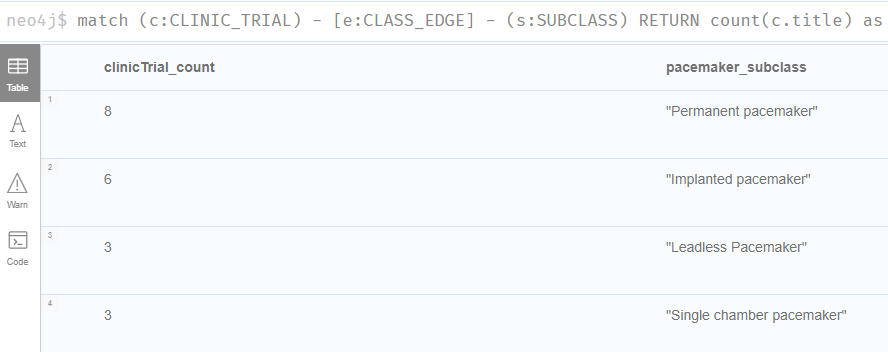

- In which states is the most money granted to NIH projects?
- match (n:NIH) -[e:STATE_EDGE]-(s:STATES) RETURN sum(toFloat(n.cost)) as grants, s.name as state order by grants desc LIMIT 3
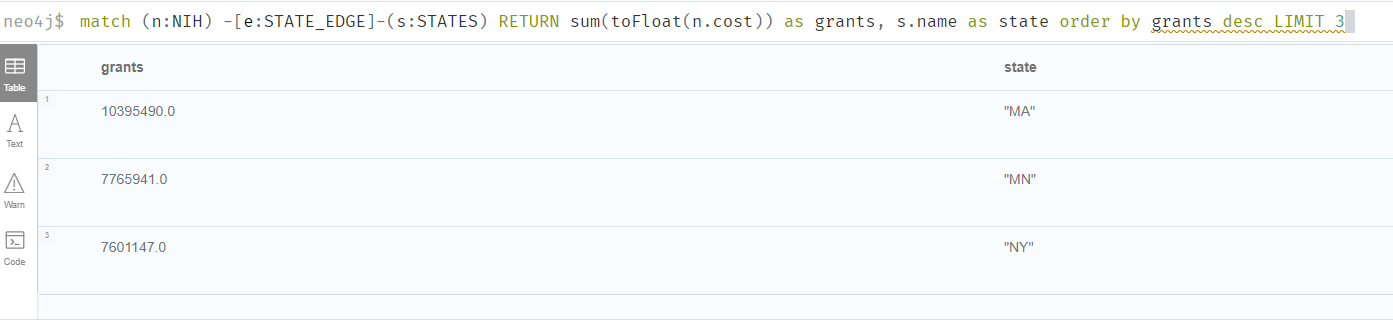

- count of journals publishing papers relating to a specific subclass or heart condition?
- match (j:JOURNAL) -[e:JOURNAL_EDGE] - (p:PUBMED) - [e2:CLASS_EDGE] - (s:SUBCLASS) RETURN distinct count(j.name) as journal_count , s.name as pacemaker_subclass order by journal_count desc
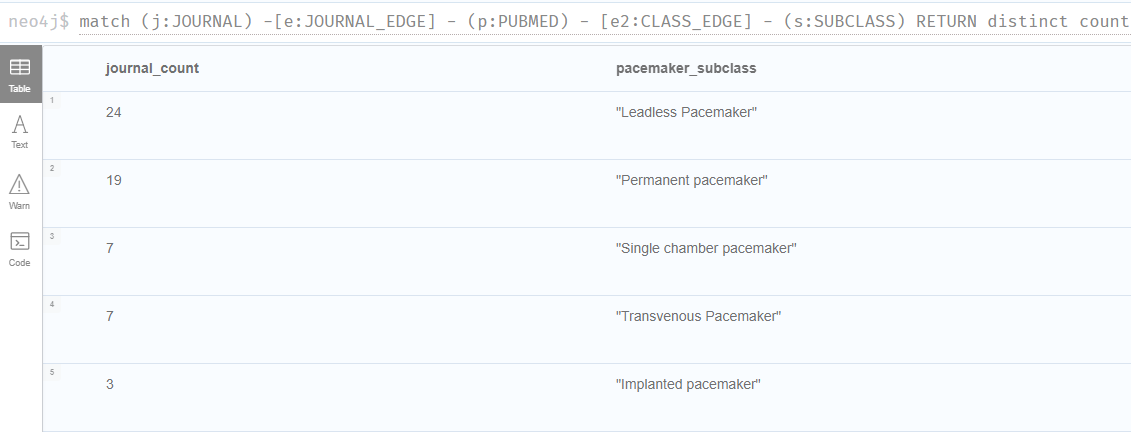
- match (j:JOURNAL) -[e:JOURNAL_EDGE] - (p:PUBMED) - [e2:CONDITION_EDGE] - (s:CONDITION) RETURN distinct count(j.name) as journal_count , s.name as heart_condition order by journal_count desc
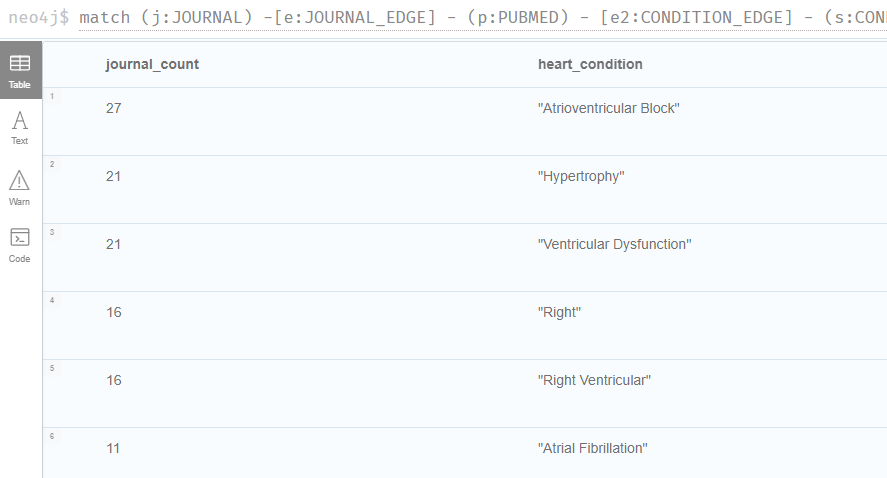

- Which authors have published the most about pacemakers?
- match (a:AUTHOR) - [e:AUTHOR_EDGE] - (p:PUBMED) -[e2:CLASS_EDGE] - (s:SUBCLASS) RETURN a.name as author, s.name as pacemaker_subclass , count(p.title) as publication_count order by publication_count desc
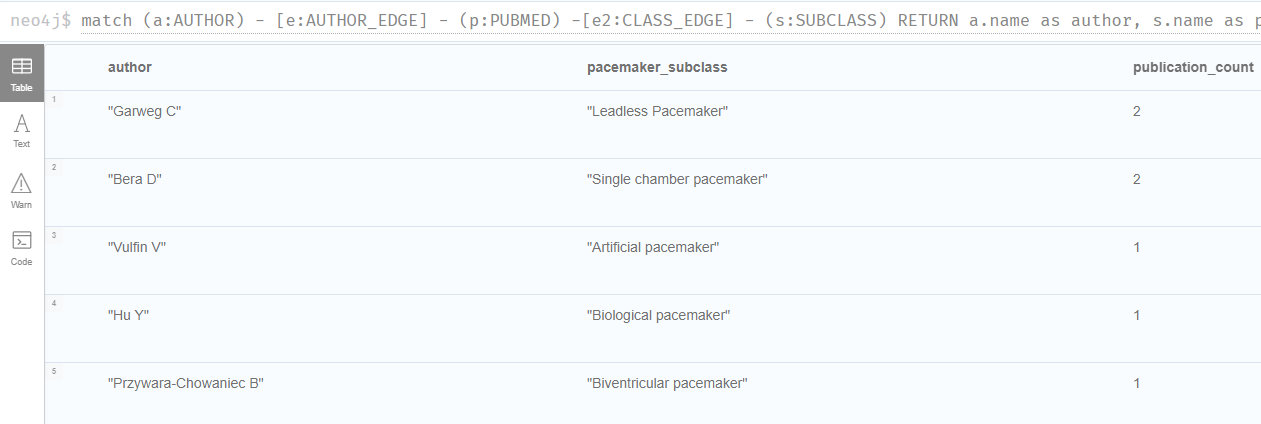

- Which organizations are sponsoring the most clinical trials related to a specific subclass or heart condition?
- match (p:SUBCLASS)-[e1:CLASS_EDGE]- (c:CLINIC_TRIAL)-[e:SPONSOR_EDGE]-(s:SPONSOR) RETURN p.name as pacemaker_subclass , count(c.title) as clinicTrial_count, s.name as sponsor_name order by clinicTrial_count desc
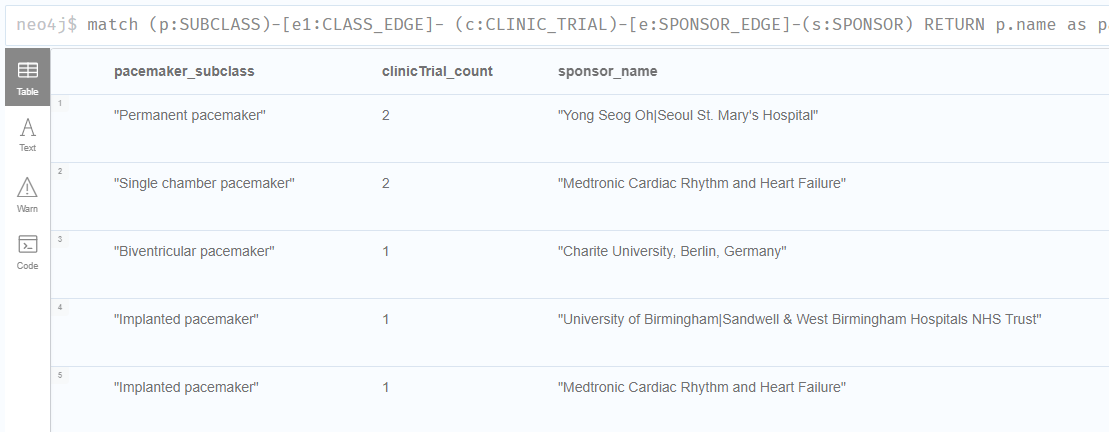

- match (p:SUBCLASS)-[e1:CLASS_EDGE]- (c:CLINIC_TRIAL)-[e:SPONSOR_EDGE]-(s:SPONSOR) RETURN p.name as pacemaker_subclass , count(c.title) as clinicTrial_count, count(s.name) as sponsor_count order by clinicTrial_count desc
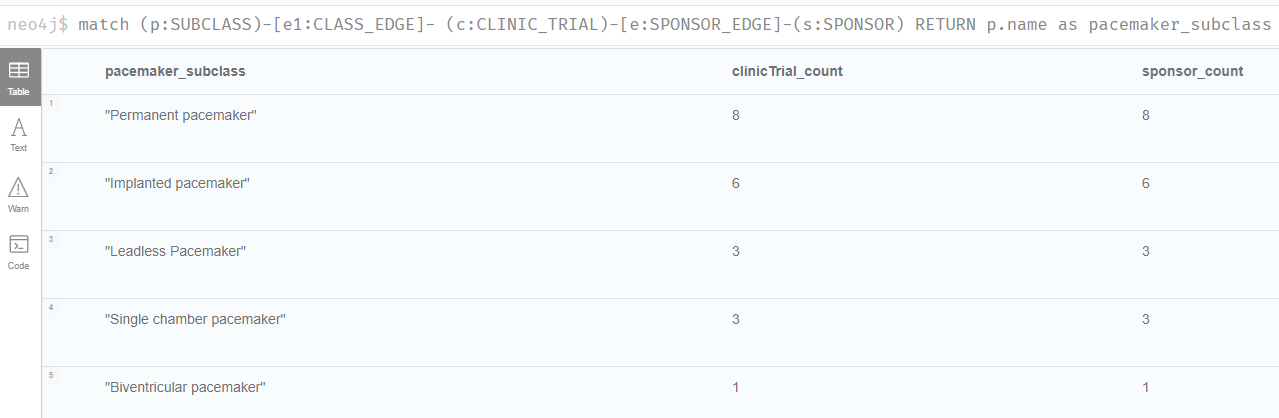

- Which heart conditions get the most funding through NIH grants?
- match (n:NIH)-[e:CONDITION_EDGE]-(c:CONDITION) RETURN sum(toFloat(n.cost)) as grants, c.name order by grants desc
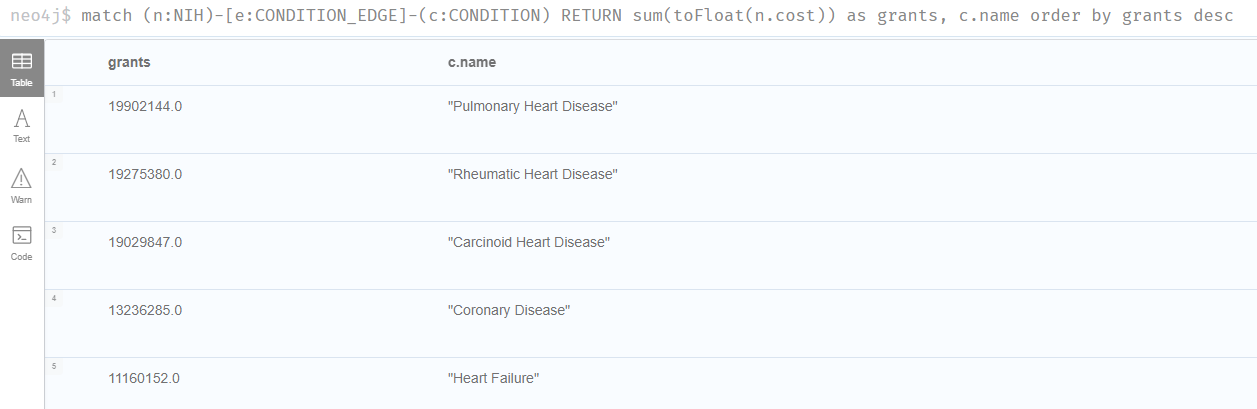

- What age groups / genders are eligible for a certain subclass of pacemaker?
- match (s:SUBCLASS)-[e1:CLASS_EDGE]- (c:CLINIC_TRIAL) -[e:AGE_EDGE] - (a:AGE_GROUP) RETURN a.name as age_group, s.name as pacemaker_subclass , count(c.title) as clinicalTrial_count order by clinicalTrial_count desc
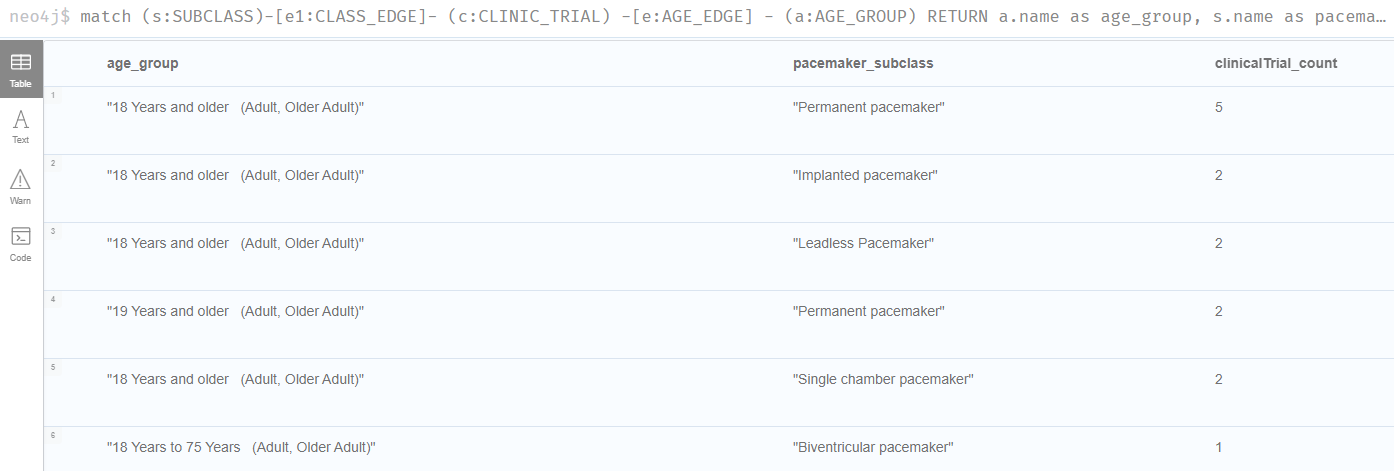

- Is there a heart condition that gets lots of funding but not many clinical trials? Or vice versa?
- match (n:NIH)-[e:CONDITION_EDGE] - (s:CONDITION) RETURN s.name as heart_condition , sum(toFloat(n.cost)) as grants order by grants desc
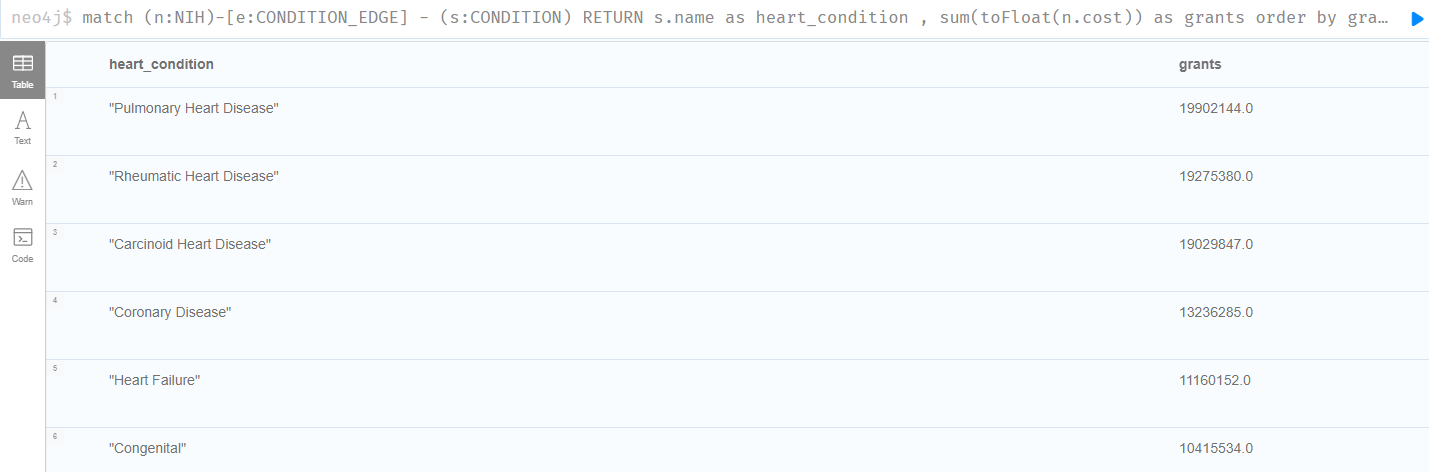

- match (n:CLINIC_TRIAL)-[e:CONDITION_EDGE] - (s:CONDITION) RETURN s.name as heart_condition , count(n.title) as clinicalTrial_count order by clinicalTrial_count desc
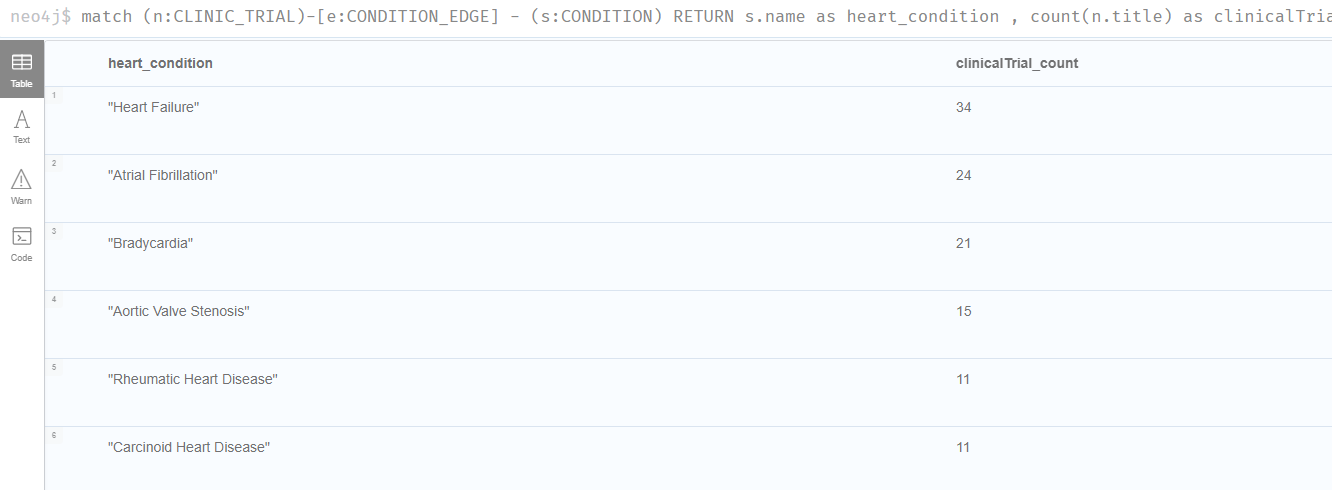

-  Is there a subclass of pacemaker that is getting more funding year by year? 
- match (y:YEARS) -[e1:YEARS_EDGE]- (n:NIH) - [e:CONDITION_EDGE] - (s:CONDITION) RETURN sum(toFloat(n.cost)) as grants, y.name as year , s.name as heart_condition order by grants desc
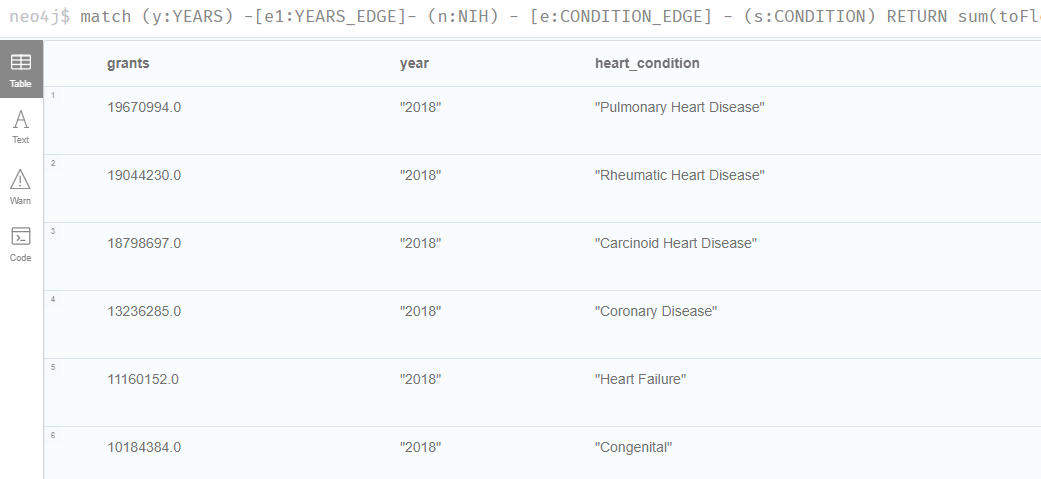